---

<h1 align='center'> Bengaluru Restaurant Price Predictor </h1>

---

  <p align="justify">
    <h3> Lifecycle of the project</h3>

* Understanding the Problem Statement
* Data Collection
* Exploratory Data Analysis
* Data Preprocessing
* Model Training
* Model Testing 
* Model Selection 
  </p>
---

<h2 align="center"> Problem Statement </h2>
  <p align="justify">The <b>aim</b> of this project is to <b>predict</b> the <b>cost</b> of   dining for two people at a <b>restaurant</b> from a dataset of restaurant <b>data</b> extracted from <b>Zomato</b> website via web scrapping.</p>

---

<h2 align='center'>Data</h2>
<p align="justify">
The <a href="https://www.kaggle.com/datasets/rishikeshkonapure/zomato">dataset</a> used in this project is taken from Kaggle. It contains data of the <b>restaurants</b> located in <b>Bengaluru</b>. The dataset contains <b>17 columns</b> and <b>51717 rows</b>. The columns are as follows:

* `url` - The Zomato url of the restaurant.
* `address` - The address of the restaurant.
* `name` - The name of the restaurant.
* `online_order` - Wheather restaurant take online order or not
* `book_table` - Wheather restaurant take online bookings of tables
* `rate` - Zomato rating of the restaurant out of 5.0.	
* `votes` - Likes received by the restaurant. 
* `phone` - Phone number of the restaurant. 
* `location` - Area where the restaurant is located 
* `rest_type` - Type tags of restaurant (Cafe, Causual Dinning, etc)
* `dish_liked` - Dishes liked by the reviewers.
* `cuisines` - Cuisine of the restaunrat.
* `reviews_list` - List of reviews left by the reviewers.
* `menu_item` - List of items on the menu.
* `listed_in(type)` - Type of restaunrant (Buffet, bar, etc.).
* `listed_in(city)` - Area where the restaurant is located.</p>

<p align='justify'> Target variable: </p>

* `approx_cost(for two people)` - Cost of dining for two people.

---


    


<h2 align='center'> Exploratory Data Analysis </h2>

<h3> Contents </h3>

1. Basic EDA
2. Univariate Analysis
3. Bivariate Analysis
4. Descriptive Statistical Analysis

---

<h3> Importing necessary libraries </h3>



In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

---

<h3> Importing the CSV-type dataset file using Pandas library</h3>

In [3]:
df = pd.read_csv('D:/Zomato_Price_Prediction/notebook/data/zomato.csv')

---

<h2 align='center'> 1. Basic EDA </h2>

<h3> Following analysis done in this section: </h3>

* Peek at the dataset
* Selecting columns
* Renaming columns
* Checking shape of the dataset
* Dropping duplicate rows
* Checking NULL values
* Checking Unique values
* Getting a summary of the dataset

---


<h3> 1.1 Top 5 rows of the dataset </h3>

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


<p>The dataset has some columns(url, name, address, etc.) which are not useful in this project.</p>

---

<h3> 1.2 Dropping columns which are not useful for prediction</h3>

In [5]:
df.drop(['url',
         'address',
         'phone',
         'reviews_list',
         'menu_item',
         'dish_liked',
         'cuisines',
         'listed_in(city)'],
         axis=1, 
        inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,600,Buffet


<p> Dataset looks cleaner and more readable </p>

---

<h3> 1.3 Renaming columns to simpler names </h3>

In [6]:
df.rename(columns={'online_order':'online',
                   'book_table':'book',
                   'rest_type':'type_tag',
                   'approx_cost(for two people)':'price',       
                   'listed_in(type)':'r_type'}, 
          inplace=True)
df.head()

,name,online,book,rate,votes,location,type_tag,price,r_type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,600,Buffet


<p> Following changes made to column names:

* `online_order` -> `online`
* `book_table` -> `book`
* `rest_type` -> `type_tag`     
* `listed_in(type)` -> `r_type`

<p> Tareget variable: </p>

* `approx_cost(for two people)` -> `price`

---




<h3> 1.4 Checking the shape of the dataset </h3>

In [7]:
df.shape

(51717, 9)

<p> The dataset has 51717 rows and 9 columns

---

<h3> 1.5 Checking and dropping duplicate rows </h3>

In [8]:
print('Number of duplicate columns:', df.duplicated().sum())
df.drop_duplicates(inplace=True)

Number of duplicate columns: 16819


<p> The dataset had 16819 duplicate rows. </p>

---

<h3> 1.6 Checking the number of NULL values in each column </h3>

In [9]:
df.isna().sum()

name           0
online         0
book           0
rate        3741
votes          0
location      14
type_tag     156
price        221
r_type         0
dtype: int64

From the above result it can be observed that 
the `rate` column has a large number of NULL values, hence they cant be dropped but the NULL values in column `price` need to be dropped since it is the target variable.

---

<h3> 1.7 Checking unique values in the dataset </h3>

In [10]:
df.nunique()

name        8792
online         2
book           2
rate          64
votes       2328
location      93
type_tag      93
price         70
r_type         7
dtype: int64

From the results it can be observed that the following are <b>categorical variables</b>:
* `online`
* `book`
* `location`
* `type_tag`
* `r_type`

Following are the <b>numerical variables</b>:
* `rate`
* `votes`
* `price`

While the <b>target variable</b> is:
* `price`

---

<h3> 1.8 Getting a basic summary of the dataset </h3>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34898 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      34898 non-null  object
 1   online    34898 non-null  object
 2   book      34898 non-null  object
 3   rate      31157 non-null  object
 4   votes     34898 non-null  int64 
 5   location  34884 non-null  object
 6   type_tag  34742 non-null  object
 7   price     34677 non-null  object
 8   r_type    34898 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.7+ MB


Only `votes` is of int type while rest of the columns are of object type.

---

<h2 align='center'> 2. Univariate Analysis </h3>

<h3> Following analysis done in this section </h3>


* Histplot of `price` and `rate` distribution
* Barplot of restaurant chain frequency
* Pieplot of `book`
* Barplot of `online`
* Pieplot of `r_type`
* Countplot of restaurant density by `location`
* Barplot of `rate` frequency

---

<h3> Data Transformation for further analysis </h3>

In [12]:
# Preprocessing price
ndf = df[df['price'].notna()]
ndf['price'] = ndf['price'].apply(lambda x: float(str(x).replace(',','')))

# Preprocessing rate
ndf['rate'].replace(['NEW', '-', np.nan], 0.0, inplace=True)
ndf['rate'] = ndf['rate'].apply(lambda x: float(str(x)[:3]))

# Removing duplicate restaurant entries
uniq_df = df.drop_duplicates(['name'])

Here, `price` variable and `rate` variable are converted into float types and another dataset `uniq_df` containing unique restaurant data is also created.

---

<h3> 2.1 Histplot to check the distribution of price and rating </h3>

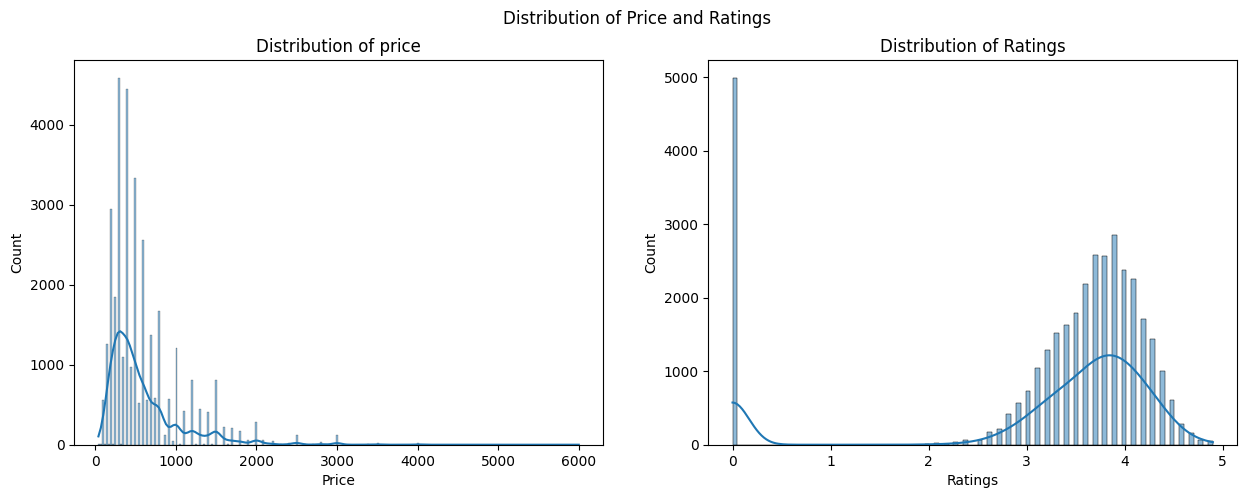

In [13]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))

sns.histplot(data=ndf, x='price',
             kde=True,
             ax=axs[0]);
axs[0].set_title("Distribution of price")
axs[0].set_xlabel("Price")

sns.histplot(data=ndf, x='rate',
             kde=True,
             ax=axs[1])
axs[1].set_title("Distribution of Ratings")
axs[1].set_xlabel("Ratings")

plt.suptitle("Distribution of Price and Ratings");

From the plot it can be obsereved that most of the values in `price` variable are between 0-1000 while most values in `rate` variable are between 3-4 with a large amount being 0.

---

<h3> 2.2 Barplot check which restaurant has the most chains in Bengaluru </h3>


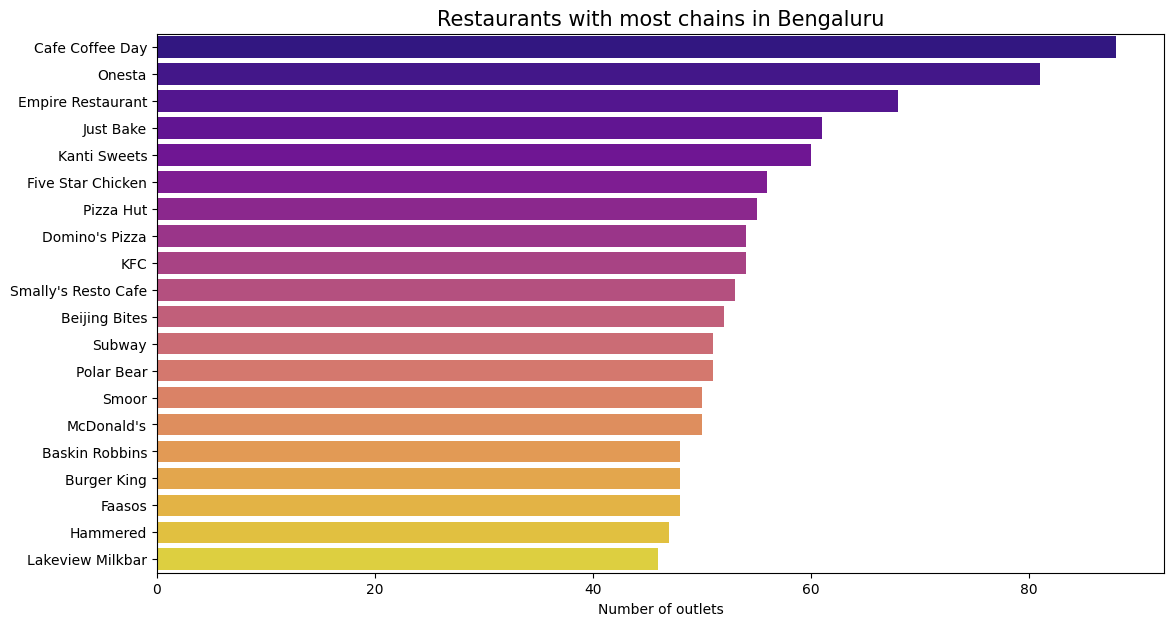

In [14]:
plt.figure(figsize=(13,7))
fam_res = df['name'].value_counts()[:20]
sns.barplot(x = fam_res,
            y = fam_res.index,
            palette = 'plasma');
plt.title("Restaurants with most chains in Bengaluru", fontsize=15)
plt.xlabel("Number of outlets");

<p> From the plot it can be observed that <b>apart</b> from <b>Cafe Coffee Day</b>, <b>local restaurant</b> chains are in <b>greater number</b> when <b>compared</b> to internation restaurant chains like <b>KFC</b>, <b>Domino's</b>, etc.

---

<h3> 2.3 Pieplot to check the percentage of restaurants taking table booking </h3>

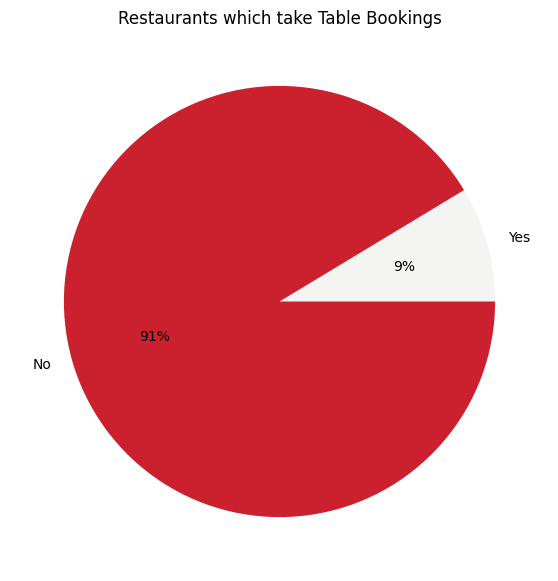

In [15]:
data = [(uniq_df['book']=='Yes').sum(),(uniq_df['book']=='No').sum()]

plt.figure(figsize=(7,7))
plt.pie(data, 
        labels=['Yes','No'], 
        colors = ['#f4f4f2', '#cb202d'], 
        autopct='%.0f%%');
plt.title("Restaurants which take Table Bookings", fontsize=12);

<p>From the plot it can be observed that the majority of restaurants dont book tables.</p>

---

<h3> 2.4 Barplot to see how many restaurants take online orders </h3>

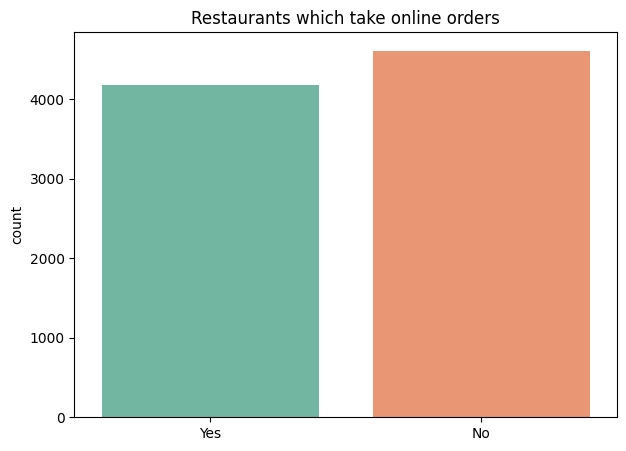

In [16]:
plt.figure(figsize=(7,5))
sns.countplot(data=uniq_df,
              x='online',
              palette="Set2");
plt.title("Restaurants which take online orders", fontsize=12);
plt.xlabel("");

<p> From the graph it can be orserved that a little more than half of all restaurants in the dataset dont take online orders. </p>

---

<h3> 2.5 Pieplot to see the distribution of restaurants by types </h3>

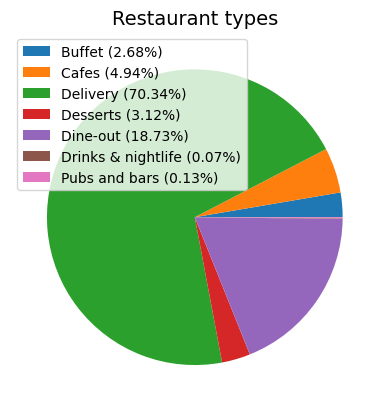

In [17]:
uniq_df.groupby('r_type').size().plot(kind='pie', labels=None);
plt.title("Restaurant types", fontsize=14)
t = uniq_df.groupby('r_type').size().sum()
sizes = [float('{:.2f}'.format((x/t)*100)) for x in uniq_df.groupby('r_type').size()]
labels = df['r_type'].unique()
plt.legend(labels = ['{0} ({1:.2f}%)'.format(l, s) for l, s in zip(labels, sizes)], loc='upper left');

From the graph it can be observed that most restaurants are of delivery type, while 'drinking and night life' and 'Pubs and bars' are the minority.

---

<h3> 2.6 Countplot to check the restaurant density by area </h3>

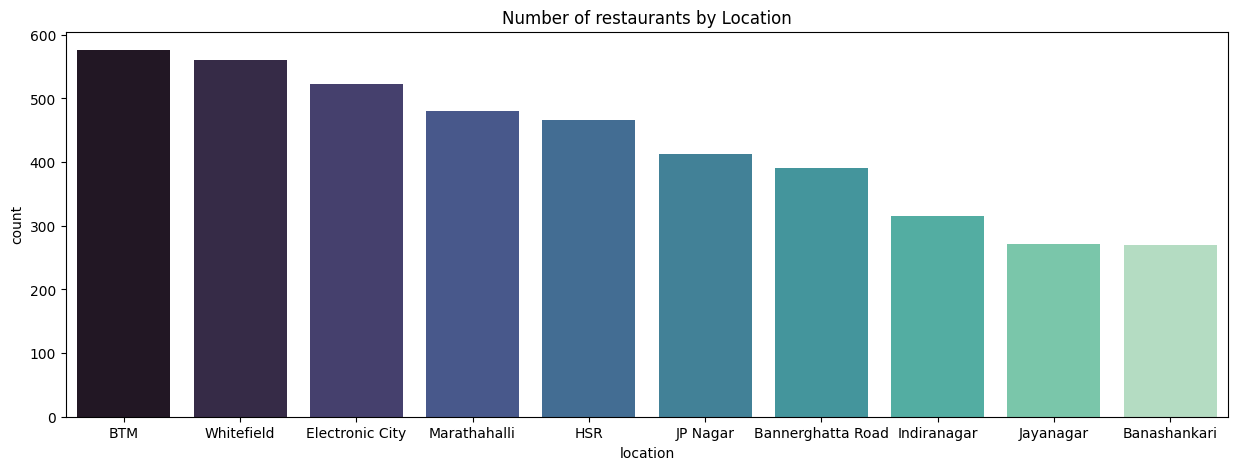

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(data=uniq_df,
              x='location',
              palette="mako",
              order = uniq_df['location'].value_counts().index[:10]);
plt.title("Number of restaurants by Location", fontsize=12);

<p> BTM, Whitefield and Electronic City seem to have the highest population of restaurant. </p>

---

<h3> 2.7 Barplot to analyse the distribution of ratings </h3>

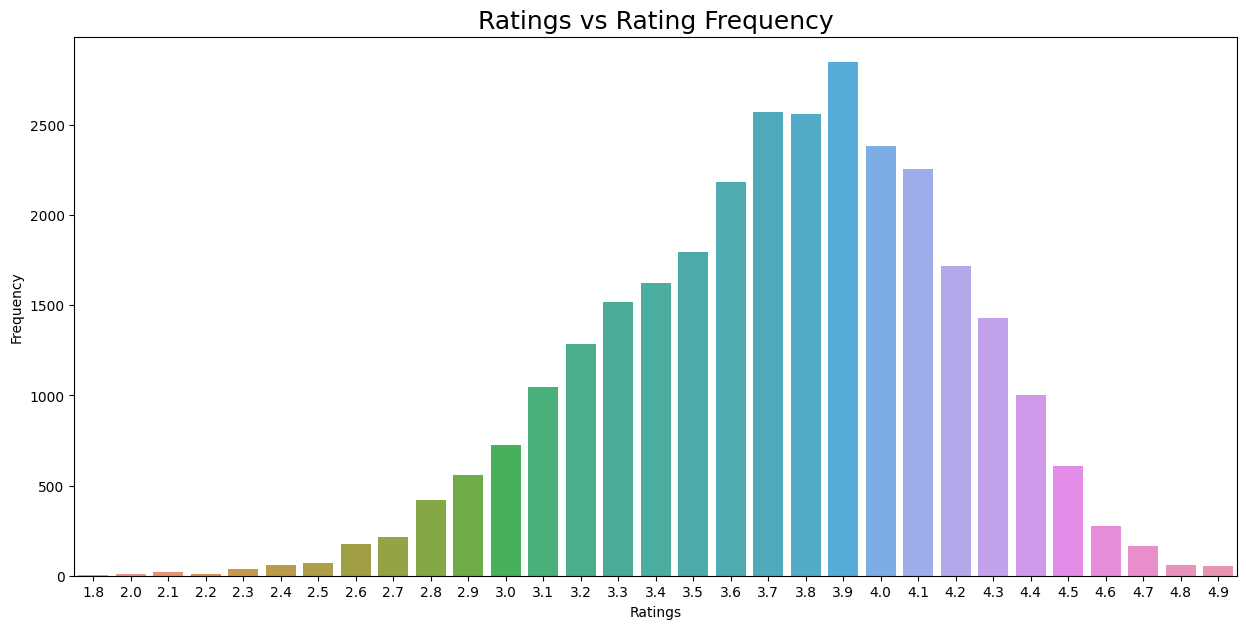

In [19]:
data = ndf['rate'][ndf['rate']!=0].value_counts()
plt.figure(figsize=(15,7))
sns.barplot(x = data.index,
            y=data);
plt.title("Ratings vs Rating Frequency", fontsize=18);
plt.xlabel("Ratings");
plt.ylabel("Frequency");

From the graph it can be observed that most frequent ratings are between 3.2 to 4.2.

---

<h2 align="center"> 3. Bivariate Analysis </h3>

<h3>Following analysis done in this section:</h3>

* Barplot of `r_type` vs `rate`
* Barplot of `location` vs `rate`
* Barplot of `rate` vs `price`
* Barplot of `location` vs `price`

---

<h3> 3.1 Barplot to analyse restaurant type and rating</h3>

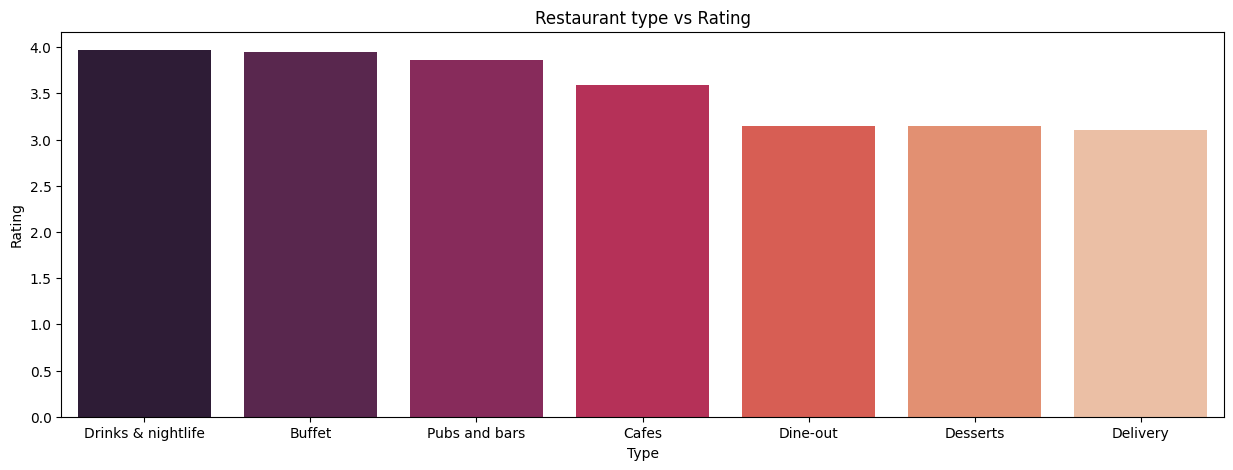

In [20]:
# Type vs Rating
data = ndf.groupby('r_type')['rate'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,5));
sns.barplot(x = data.index,
            y = data,
            order=data.index[:10],
            palette='rocket');
plt.title("Restaurant type vs Rating", fontsize=12)
plt.xlabel("Type")
plt.ylabel("Rating");

From the graph it can be observed that 'Buffet', 'Drinks & nightlife' are rated highly while 'Delivery' and 'Desserts' have lower ratings.

---

<h3> 3.2 Barplot to analyse restaurant rating by location

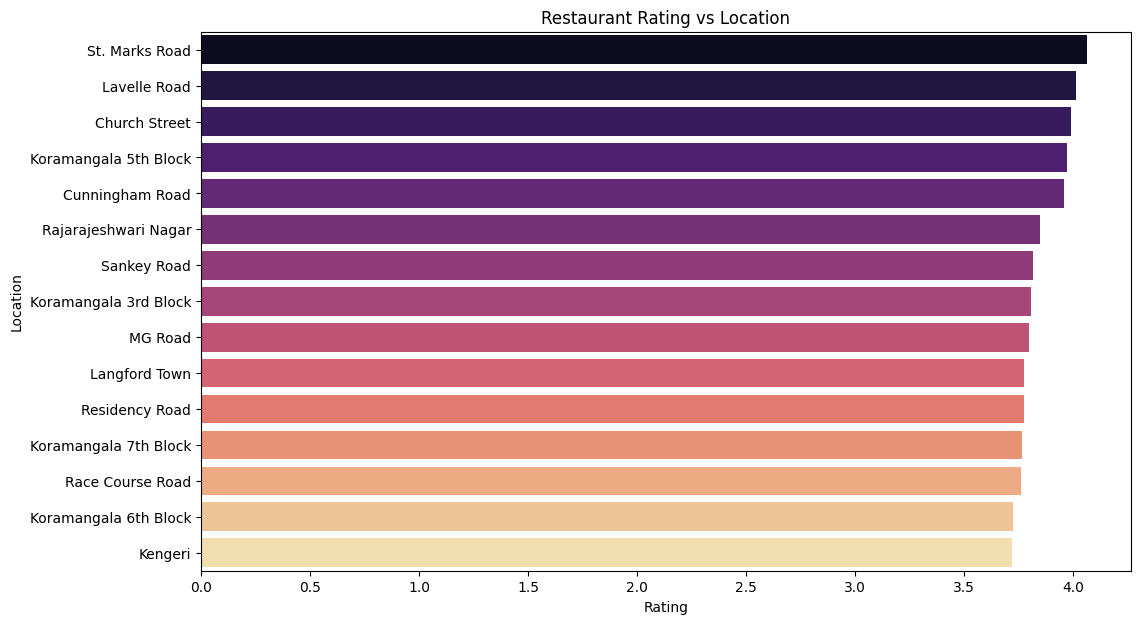

In [21]:
# Rating vs Location
data = ndf.groupby('location')['rate'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(y=data.index,
            x=data,
            order=data.index[:15],
            palette='magma');
plt.title("Restaurant Rating vs Location", fontsize=12)
plt.xlabel("Rating")
plt.ylabel("Location");

From the plot it can be observed restaunrants in 'St. Marks Road' are rated highest while restaunrants in 'Infantry Road' are on lower spectrum of ratings.

---

<h3> 3.3 Barplot to analyse the Rating vs Price </h3>

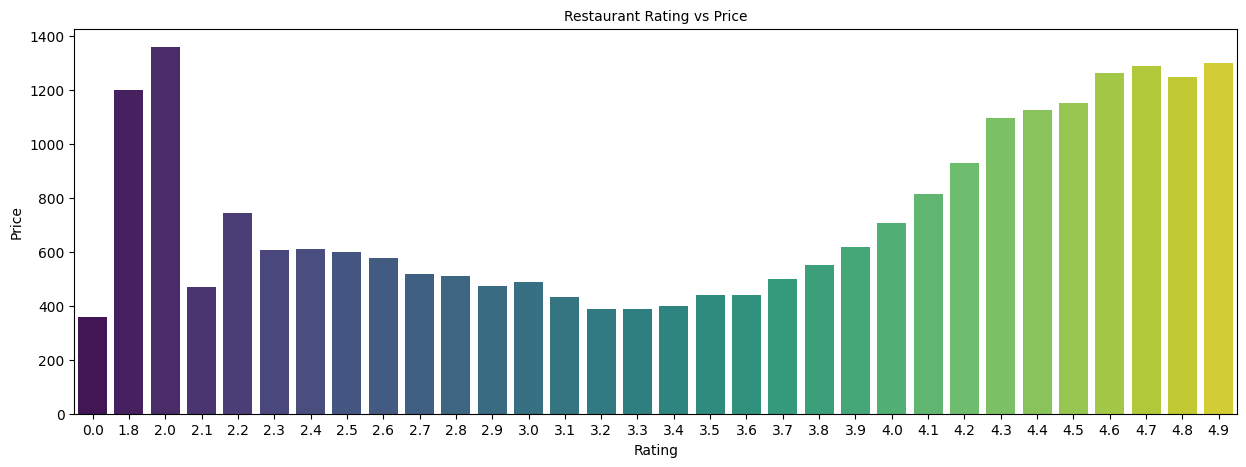

In [22]:
# Rating vs Price
data = ndf.groupby('rate')['price'].mean()
plt.figure(figsize=(15,5))
sns.barplot(x=data.index,
            y=data,
            palette="viridis");
plt.title("Restaurant Rating vs Price", fontsize=10)
plt.xlabel("Rating")
plt.ylabel("Price");

From the graph it can be observed that most expesive restaurants are rated high while few are rated lowest. Most low price restaurants are rated average.

---

<h3> 3.4 Barplot to analyse Locations by Price </h3>

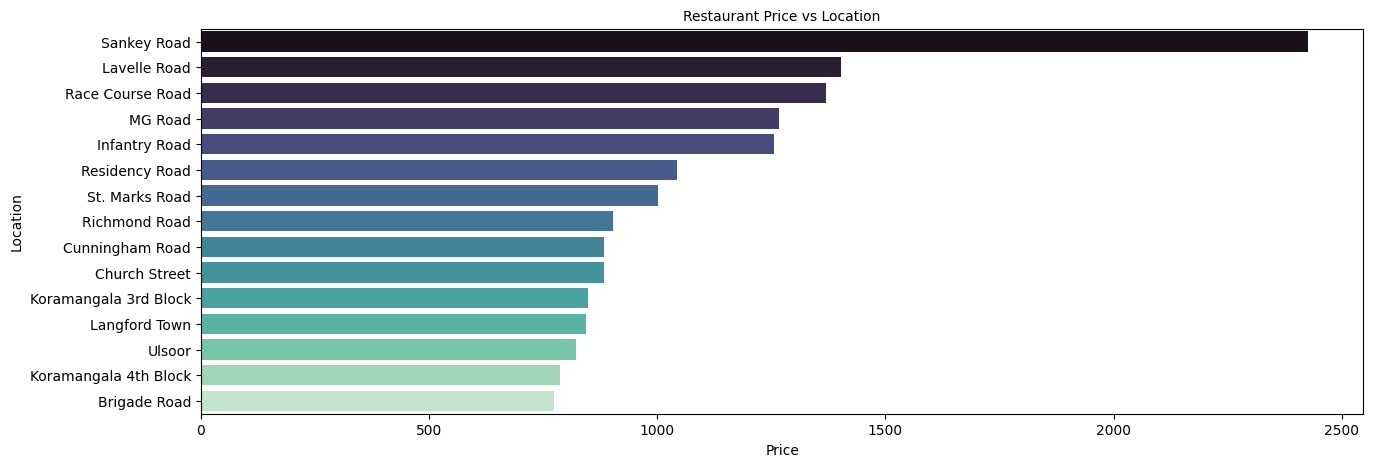

In [23]:
# Area vs Price
data = ndf.groupby('location')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(y=data.index,
            x = data,
            order=data.index[:15],
            palette='mako');
plt.title("Restaurant Price vs Location", fontsize=10)
plt.xlabel("Price")
plt.ylabel("Location");

From the plot it can be observed that the restaurants in 'Sankey Road' are expensive while the restaurants in 'Sadashiv Nagar' are lower priced.

---

<h2 align='center'> 4. Descriptive Statistical Analysis </h3> 

<h3>Following analysis done in this section:</h3>

* Description of the dataset
* Table of numerical feature's distribution
* Heatmap of feature correlation
* Heatmap of feature covariance

---

<h3> Data transformation and Preprocessing for descriptive analysis </h3>

In [24]:
# Creating a new dataframe without 'name' and 'r_city' variable
stat_df = df.drop(['name'],axis=1)
stat_df.drop_duplicates(inplace=True)

# Shifting target variable to last place
price = stat_df.pop("price")
stat_df.insert(7, "price", price)

# Removing NULL values from price and type_tag
stat_df = stat_df[stat_df['price'].notna()]
stat_df = stat_df[stat_df['type_tag'].notna()]

# Substituting unrated values of 'rate' with mean
stat_df['rate'].replace(['NEW', '-', np.nan], 0.0, inplace=True)
stat_df['rate'] = stat_df['rate'].apply(lambda x: float(str(x)[:3]))
mean = round(stat_df['rate'].mean(), 1)

# Converting 'price' to float
stat_df['price'] = stat_df['price'].apply(lambda x: float(str(x).replace(',','')))

# Splitting and exploding 'type_tag'
stat_df['type_tag'] = stat_df['type_tag'].apply(lambda x: str(x).split(','))
stat_df = stat_df.explode('type_tag')

# Mapping columns with binary values
stat_df['online'] = stat_df['online'].map({'Yes':1.0, 
                                           'No':0.0})
stat_df['book'] = stat_df['book'].map({'Yes':1.0,
                                       'No':0.0})

# Label encoding
type_tag_le = preprocessing.LabelEncoder()
stat_df['type_tag'] = type_tag_le.fit_transform(stat_df['type_tag'])

location_le = preprocessing.LabelEncoder()
stat_df['location'] = location_le.fit_transform(stat_df['location'])

r_type_le = preprocessing.LabelEncoder()
stat_df['r_type'] = r_type_le.fit_transform(stat_df['r_type'])

# Converting dataframe to float type
stat_df=stat_df.astype(float)
stat_df.head()

,online,book,rate,votes,location,type_tag,r_type,price
0,1.0,1.0,4.1,775.0,1.0,22.0,0.0,800.0
1,1.0,0.0,4.1,787.0,1.0,22.0,0.0,800.0
2,1.0,0.0,3.8,918.0,1.0,21.0,0.0,800.0
2,1.0,0.0,3.8,918.0,1.0,4.0,0.0,800.0
3,0.0,0.0,3.7,88.0,1.0,37.0,0.0,300.0


---

<h3> 4.1 Basic statistical summary of the dataset </h3>

In [25]:
stat_df.describe()

,online,book,rate,votes,location,type_tag,r_type,price
count,38276.000000,38276.000000,38276.000000,38276.000000,38276.000000,38276.000000,38276.000000,38276.000000
mean,0.608893,0.192993,3.389090,449.070436,37.949315,25.217342,2.899363,644.302043
std,0.488005,0.394653,1.207283,1102.718466,27.063896,10.808641,1.232166,494.872028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000
25%,0.000000,0.000000,3.300000,16.000000,16.000000,21.000000,2.000000,300.000000
50%,1.000000,0.000000,3.700000,76.000000,33.000000,22.000000,2.000000,500.000000
75%,1.000000,0.000000,4.100000,355.000000,56.000000,37.000000,4.000000,800.000000
max,1.000000,1.000000,4.900000,16832.000000,92.000000,39.000000,6.000000,6000.000000


From the results it can be observed that:
* There are total 38276 unique columns.
* There are 93 locations in the dataset.
* There are 40 type_tags in the dataset.
* There are 7 restaurant types in the dataset.

---

<h3> 4.2 Table for numerical features description </h3>

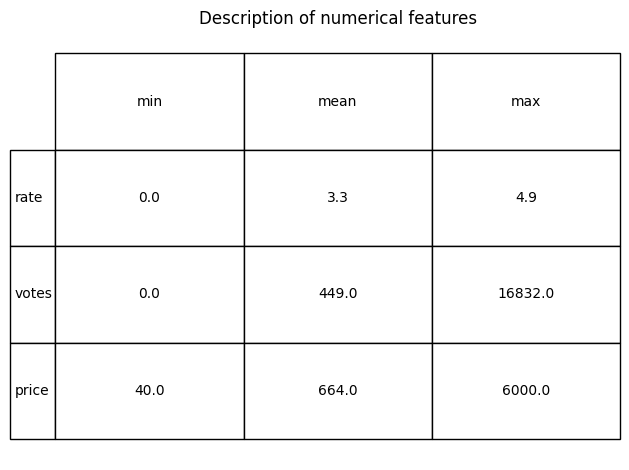

In [26]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

tdf = pd.DataFrame(np.array([0.0, 3.3, 4.9, 0, 449, 16832, 40, 664, 6000]).reshape(3,3), 
                   columns=['min', 'mean', 'max'], 
                   index=['rate', 'votes', 'price'])

table = ax.table(cellText=tdf.values, 
                 colLabels=tdf.columns, 
                 cellLoc='center', 
                 loc='center', 
                 rowLabels=tdf.index)

table.scale(1,5)
ax.set_title("Description of numerical features")
fig.tight_layout()
plt.show()

Observations:
* Mean rating in 3.3, min is 0.0 while max is 4.9.
* Mean votes are 449, min are 0 while max are 16832.
* Mean price is 664, min is 40 while max is 6000

---

<h3> 4.3 Heatmap of the correlation between features </h3>

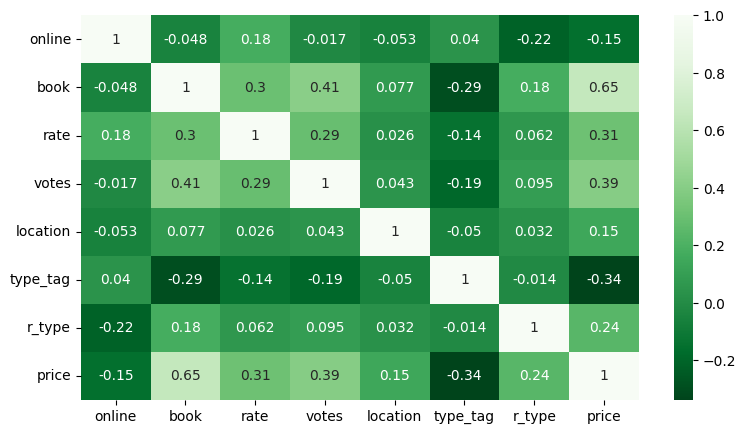

In [27]:
plt.figure(figsize=(9,5))
hm = sns.heatmap(stat_df.corr(),
                 annot=True,
                 cmap='Greens_r');

From the plot it can be observed that none of features show too high of a correlation with taget variable `price` thus there is no risk of data leakage.

---

<h3> 4.4 Heatmap of covariance of features </h3>

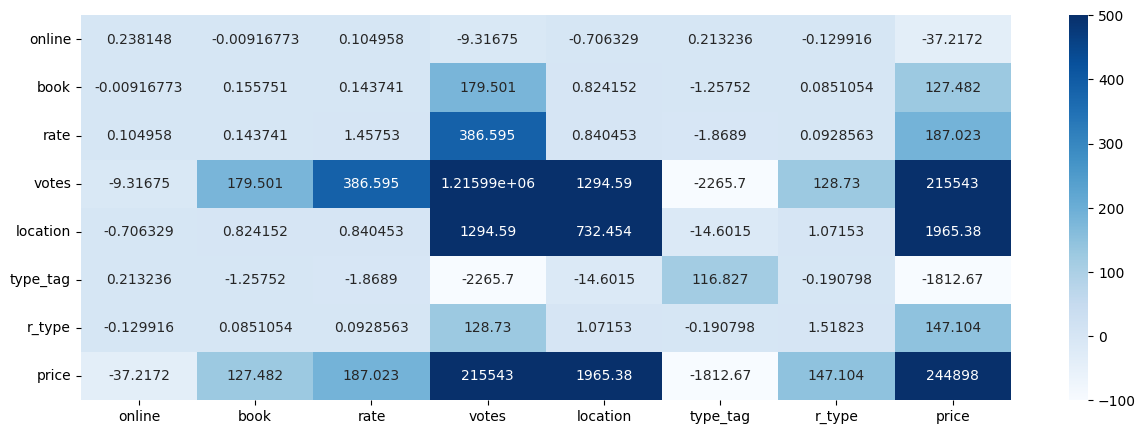

In [28]:
plt.figure(figsize=(15,5))
hm = sns.heatmap(stat_df.cov(),
                 vmin=-100, 
                 vmax=500,
                 annot=True, 
                 cmap='Blues',
                 fmt='g');

From the results it can be concluded that price is dependent on features `votes`, `location` and `type_tag`.

---
---